In [75]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
os.chdir('..')


In [13]:
df = pd.read_csv(r"data\raw\diabetes_prediction_dataset.csv")

In [14]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [28]:
df.shape

(100000, 9)

In [21]:
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [22]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [59]:
cat_columns = ["hypertension", "heart_disease", "diabetes", "gender", "smoking_history"]
df[cat_columns] = df[cat_columns].astype("category")

In [60]:
df.dtypes

gender                 category
age                     float64
hypertension           category
heart_disease          category
smoking_history        category
bmi                     float64
HbA1c_level             float64
blood_glucose_level       int64
diabetes               category
dtype: object

In [61]:
df.duplicated().sum()

np.int64(0)

In [62]:
df = df.drop_duplicates()

In [35]:
df.duplicated().sum()

np.int64(0)

In [63]:
df.describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,27.321461,5.532609,138.218231
std,22.462948,6.767716,1.073232,40.909771
min,0.080000,10.010000,3.500000,80.000000
25%,24.000000,23.400000,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,59.000000,29.860000,6.200000,159.000000
max,80.000000,95.690000,9.000000,300.000000


<Axes: >

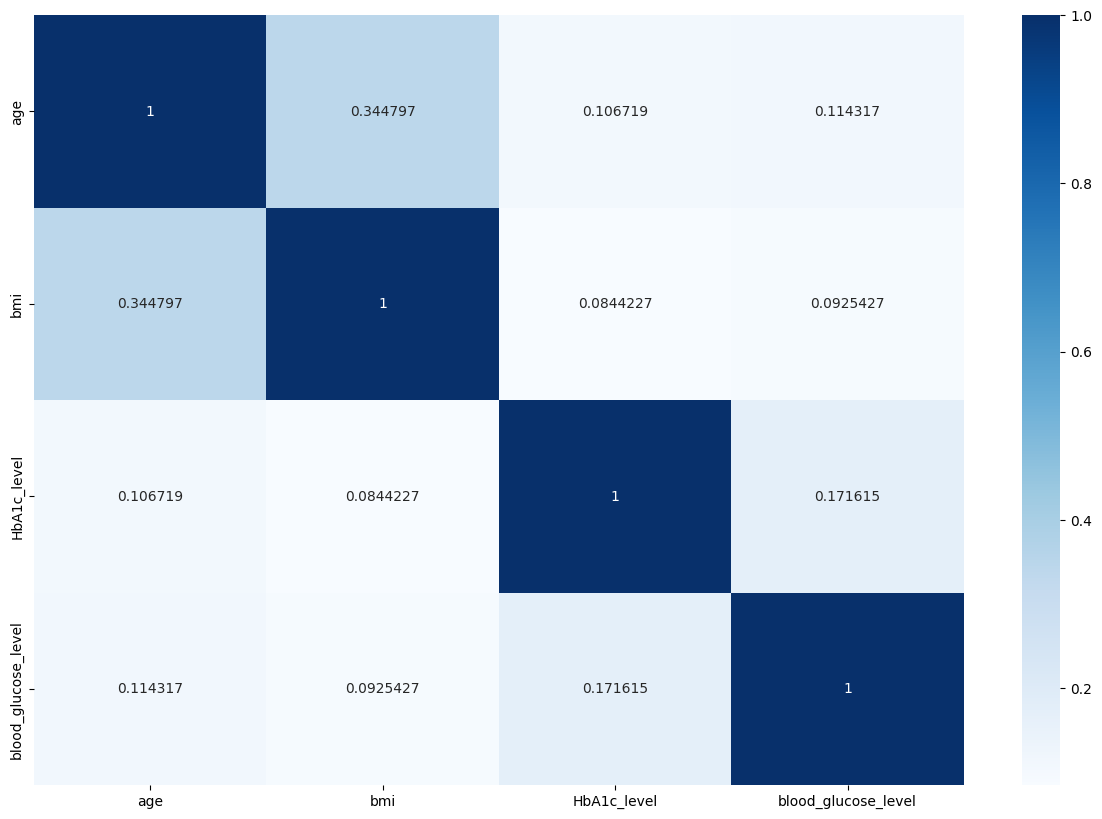

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True), fmt='g', annot=True, cmap='Blues')

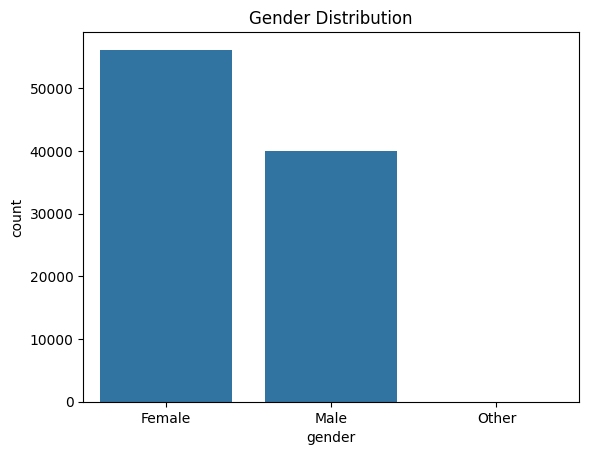

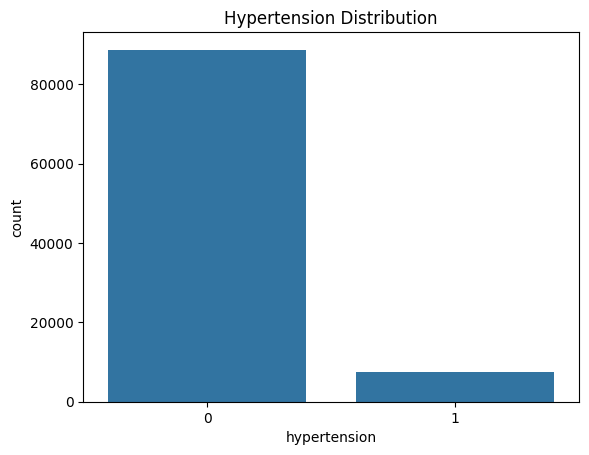

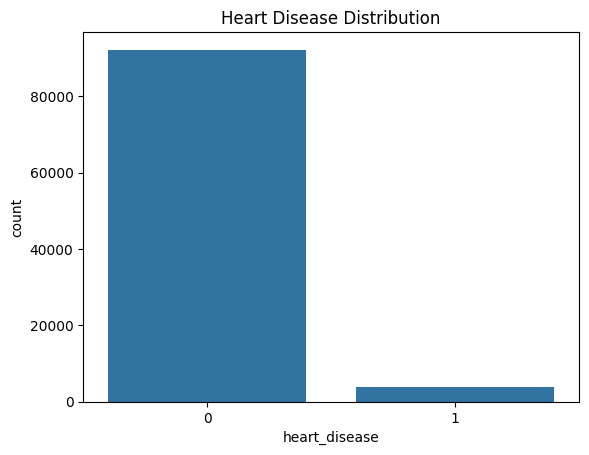

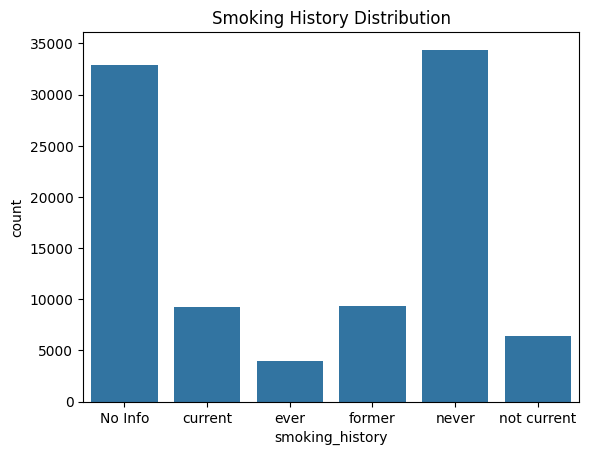

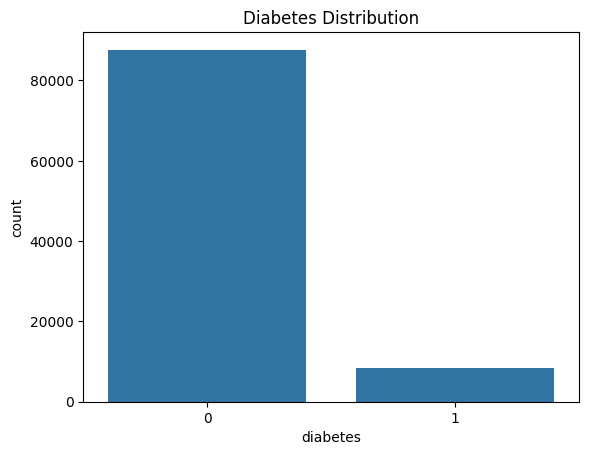

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()


sns.countplot(x='hypertension', data=df)
plt.title('Hypertension Distribution')
plt.show()


sns.countplot(x='heart_disease', data=df)
plt.title('Heart Disease Distribution')
plt.show()


sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()


sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()


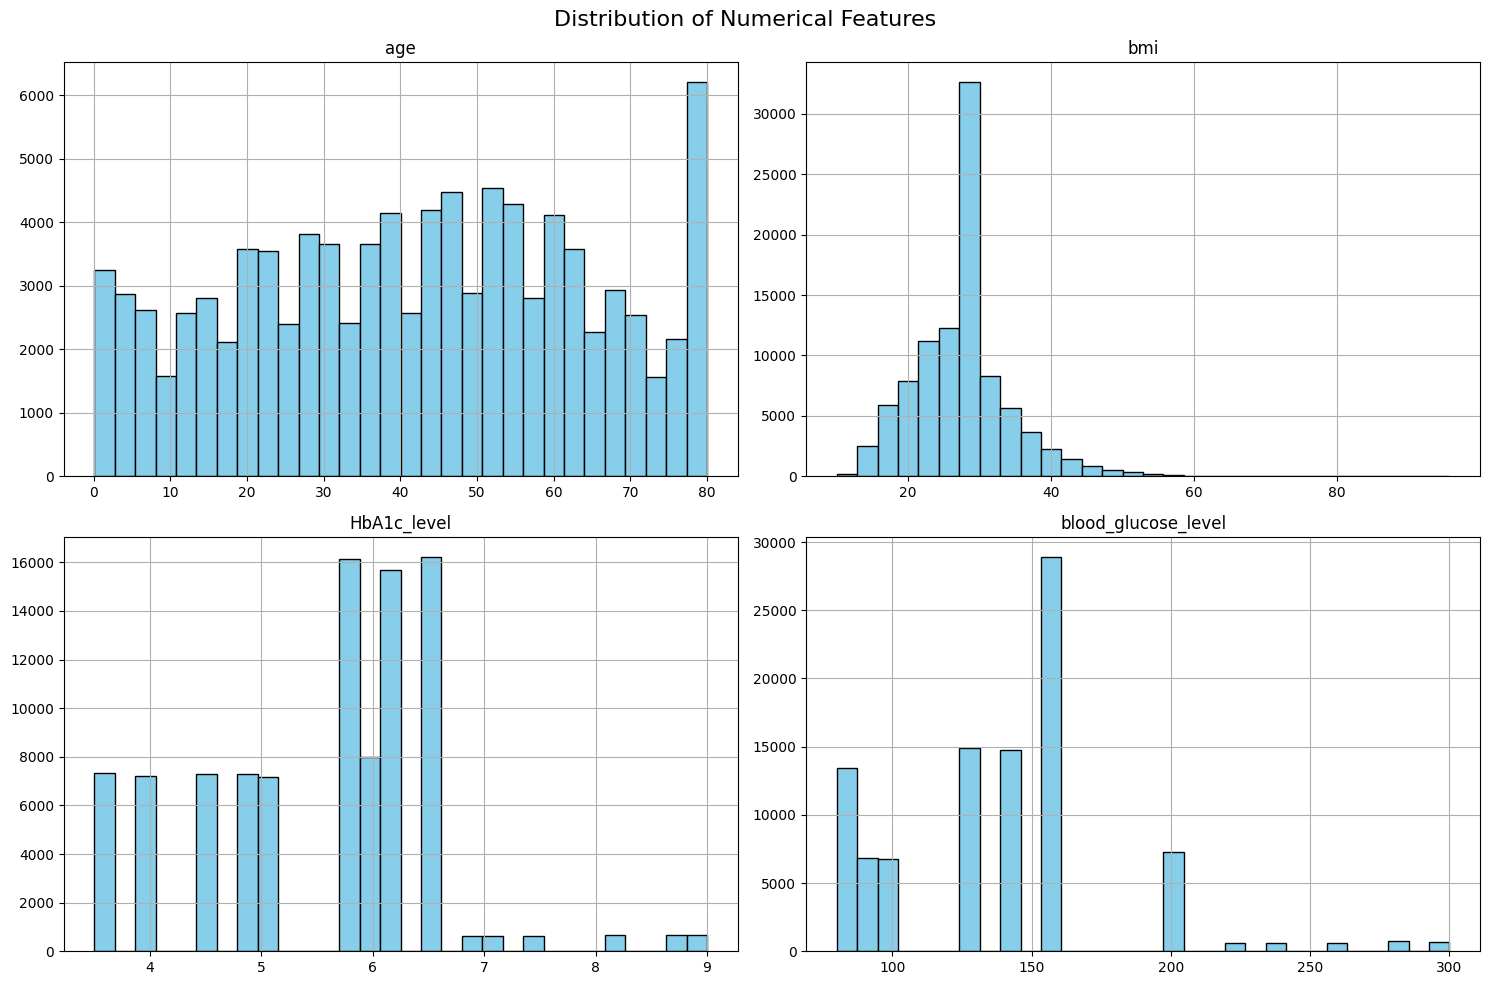

In [67]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


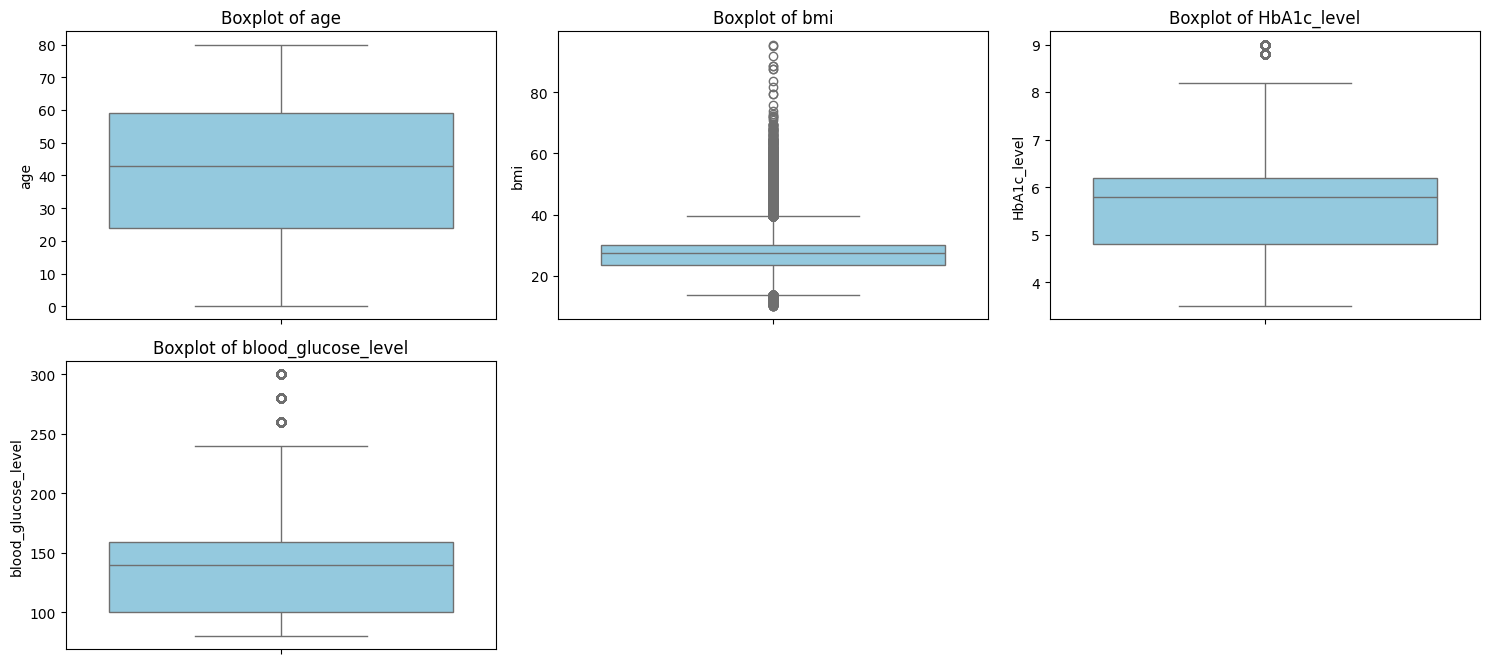

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns


numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns


plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i) 
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


In [69]:
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[(df["bmi"] >= lower_bound) & (df["bmi"] <= upper_bound)]


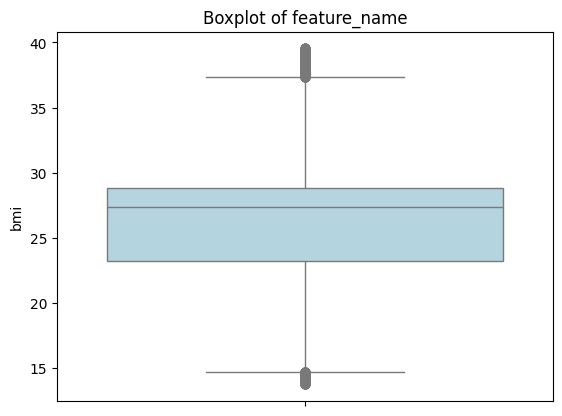

In [70]:
sns.boxplot(y=df_cleaned["bmi"], color="lightblue")
plt.title("Boxplot of feature_name")
plt.show()


In [93]:
df_cleaned.reset_index(drop=True, inplace=True)

In [96]:
x = df_cleaned.drop(["diabetes"], axis=1)
y = df_cleaned[["diabetes"]]

In [98]:
rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(x, y)

print("Original class distribution:\n", y.value_counts())
print("\nResampled class distribution:\n", y_resampled.value_counts())


Original class distribution:
 diabetes
0           83577
1            7215
Name: count, dtype: int64

Resampled class distribution:
 diabetes
0           7215
1           7215
Name: count, dtype: int64


In [102]:
final_df = pd.concat([X_resampled, y_resampled], axis=1)

In [103]:
final_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
43108,Female,63.0,0,0,never,22.36,3.5,100,0
25148,Female,66.0,0,0,former,35.08,4.0,126,0
18450,Female,60.0,0,0,never,25.84,4.5,126,0
70622,Male,65.0,1,0,never,31.29,5.7,126,0
22059,Female,47.0,0,0,never,25.05,4.5,140,0


In [104]:
final_df.shape

(14430, 9)

In [105]:
import os

directory = "data/processed"

if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Directory '{directory}' created.")
else:
    print(f"Directory '{directory}' already exists.")


Directory 'data/processed' already exists.


In [108]:
final_df.to_csv("data/processed/processed.csv")